<center> <span style="color:indigo">Matemáticas aplicadas a Ciencia de Datos</span> </center>

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/2/2b/Centro_Universitario_del_Guadalajara_Logo.png" alt="Drawing" style="width: 600px;"/>
</center>

<center> <span style="color:DarkBlue">  Proyecto Integrador, dataset Datos Historicos de Pedidos y de Facturacion </span>  </center>
<center> <span style="color:Blue"> Roberto Alejandro Chagra Martinez </span>  </center>

# Introducción

## Objetivo general
objetivo que el estudiante demuestre un entendimiento teóríco-práctico de los métodos matemáticos que sustentan a los modelos de Machine Learning. A diferencia del proyecto integrador de Machine Learning e Inferencia Bayesiana, este proyecto no solo evalúa el desempeño computacional del modelo, sino su justificación conceptual y matemática, incluyendo:
* Formulación del modelo
* Función de costo o criterio de optimización
* Algoritmo de Aprendizaje (si aplica)
* Propiedades Teóricas Relevantes
* Ventajas y Limitaciones Matemáticas
* Aplicación Básica sobre un Dataset de Interés

# Planteamiento del problema

La organización disponía de un conjunto de datos históricos de pedidos y facturación que originalmente presentaba una estructura de "formato ancho" (wide format), con columnas correspondientes a periodos mensuales, lo cual resultaba ineficiente para el modelado de series de tiempo.

El problema principal radica en la necesidad de transitar de una planeación reactiva a una proactiva para optimizar la cadena de suministro. Dada la volatilidad del mercado y la existencia de patrones estacionales, se requería un sistema capaz de:

1. Capturar ciclos estacionales y tendencias a largo plazo.
2. Enfocar los recursos computacionales en los artículos de mayor impacto comercial, aplicando el principio de Pareto para seleccionar los **Top 10 Productos** y **Top 5 Clientes**.
3. Generar pronósticos robustos con un horizonte de 12 meses para la toma de decisiones de inventario.

# Descripción del Dataset

### Descripción del Dataset y Variables
* **Dataset:** Archivo "Datos Históricos de Pedidos y de Facturación.csv" que cubre el periodo 2019-2025.
* **Estructura Original:** Formato ancho (columnas por meses) transformado a formato largo (melt) para análisis transaccional.

**Variables Principales:**
* **Fecha:** Variable temporal, índice de la serie de tiempo.
* **Producto_Descripcion:** Identificador categórico del ítem vendido.
* **Cliente_Descripcion:** Identificador categórico del comprador.
* **Pedido_Piezas:** Variable Objetivo. Cantidad numérica discreta de demanda.

# Desarrollo teórico

### Formulación matemática del modelo
El modelo seleccionado es un Ensamble por Promedio (Averaging Ensemble) que combina tres predictores bases: Random Forest, SARIMA y Prophet.

**Ecuación del Ensamble:**
La predicción final $\hat{y}_{t}$ para un tiempo $t$ se define como el promedio aritmético de las predicciones individuales:

$$
\hat{y}_{t}=\frac{1}{3}(\hat{y}_{RF}(t)+\hat{y}_{SARIMA}(t)+\hat{y}_{Prophet}(t))
$$

Donde cada componente $f_{k}$ tiene su propia estructura matemática interna:

1.  **$\hat{y}_{RF}(t)$ (Componente No Paramétrico):** Es el promedio de las predicciones de $M$ árboles de decisión de regresión $(h_{m})$, donde la entrada $X$ incluye variables temporales transformadas (año, mes, día).
    $$
    \mathcal{F}_{RF}=\frac{1}{M}\sum_{m=1}^{M}h_{m}(x)
    $$

2.  **$\hat{y}_{SARIMA}(t)$ (Componente Estocástico Lineal):** Modela la serie de tiempo basándose en sus propios retardos y errores pasados, asumiendo estacionariedad tras diferenciación.
    $$
    \Phi_{P}(B)\Phi_{P}(B^{s})(1-B)^{d}(1-B^{s})^{D}y_{t}=\theta_{q}(B)\Theta_{Q}(B^{s})\epsilon_{t}
    $$
    Donde $B$ es el operador de retardo, y $\Phi, \Theta$ son los polinomios de parámetros autorregresivos y de media móvil.

3.  **$\hat{y}_{Prophet}(t)$ (Componente Aditivo Generalizado):** Descompone la serie en tendencia $g(t)$, estacionalidad $s(t)$ (modelada con series de Fourier) y efectos de días festivos $h(t)$.
    $$
    y(t)=g(t)+s(t)+h(t)+\epsilon_{t}
    $$

### Supuestos Matemáticos implícitos
* **Independencia de Errores:** Se asume que los errores de los modelos individuales no están perfectamente correlacionados entre sí. Al promediarlos, la varianza del error total del ensamble tiende a reducirse comparada con la varianza de los modelos individuales, mejorando la robustez.
* **Ponderación Equitativa:** El uso de un promedio simple $(1/3)$ asume que los tres modelos tienen una capacidad predictiva a priori comparable o que se desea evitar el sobreajuste a un solo tipo de algoritmo.

### Función de Costo
Para la evaluación y selección del modelo final en el proyecto, se utilizó la Raíz del Error Cuadrático Medio (RMSE) como métrica de pérdida global.

$$
RMSE=\sqrt{\frac{1}{N}\sum_{i=1}^{N}(y_{i}-\hat{y}_{i})^{2}}
$$

Sin embargo, cada componente matemático optimiza su propia función de costo interna durante el entrenamiento:
* **Random Forest:** Minimiza el Mean Squared Error (MSE) en cada división de los nodos del árbol para reducir la varianza.
* **SARIMA:** Utiliza la Estimación de Máxima Verosimilitud (MLE). Busca los parámetros que maximizan la probabilidad de observar los datos dados: $L(\theta | data)$.

### Método de Optimización
Dado que el modelo final es un promedio simple, no hubo un algoritmo de optimización iterativo para encontrar "pesos" del ensamble (los pesos son fijos a $1/3$). No obstante, los sub-modelos utilizan los siguientes métodos:

* **Algoritmo para SARIMA (Máxima Verosimilitud / Filtro de Kalman):** Conceptualmente, el algoritmo ajusta los coeficientes autorregresivos (AR) y de media móvil (MA) recorriendo el espacio de parámetros hasta encontrar aquellos que hacen que los datos históricos sean "lo más probables posible" bajo la distribución asumida (generalmente Gaussiana). Es un método de optimización basado en gradientes o métodos numéricos (como BFGS) sobre la función de verosimilitud.
* **Algoritmo para Random Forest (Bagging y Partición Recursiva):** No usa descenso del gradiente. Utiliza un enfoque voraz (greedy). En cada nodo, selecciona aleatoriamente un subconjunto de características (en este caso: año, mes, día, festivo) y busca el punto de corte que maximice la reducción de la impureza (varianza) de la variable objetivo (Pedido_Piezas).

**Justificación de funcionamiento:** Este enfoque híbrido funciona porque combina optimización paramétrica (SARIMA/Prophet ajustando curvas suaves) con optimización no paramétrica (Random Forest segmentando el espacio de decisiones), cubriendo diferentes naturalezas del error.

### Propiedades Matemáticas Relevantes
* **Reducción de Varianza (Teorema del Ensamble):** La propiedad fundamental que justifica este modelo es que la varianza del promedio de variables aleatorias independientes (o débilmente correlacionadas) es menor que la varianza de las variables individuales.
    $$
    Var(\overline{x})=\frac{1}{N^{2}}\sum Var(x_{i})+Covarianzas
    $$
    Al promediar modelos distintos (RF, SARIMA, Prophet), se busca reducir el error de varianza sin aumentar significativamente el sesgo.
* **Estacionalidad y Descomposición:** El modelo asume que la serie temporal $Y_{t}$ puede descomponerse en componentes aditivos (Tendencia + Estacionalidad + Residuo). Esto fue validado matemáticamente mediante la prueba de descomposición estacional (seasonal_decompose), confirmando la existencia de patrones cíclicos anuales.
* **Naturaleza No Lineal:** A diferencia de una regresión lineal simple, el espacio de hipótesis de este modelo no está restringido a hiperplanos. Random Forest permite aproximar funciones no lineales complejas y discontinuidades.

### Pros y Contras del Modelo (Perspectiva Matemática)

**Pros:**
* **Robustez Estocástica:** Al no depender de una sola asunción estadística (ej. normalidad de los residuos necesaria para SARIMA), el modelo es más robusto ante violaciones de supuestos.
* **Manejo de Multicolinealidad:** Random Forest (uno de los componentes) es naturalmente inmune a la multicolinealidad entre variables predictoras (como mes y día del año), ya que selecciona características aleatoriamente en cada división.
* **Flexibilidad ante la Estacionalidad:** Puede modelar tanto estacionalidad estricta (SARIMA) como efectos de calendario irregulares (Prophet con festivos) simultáneamente.

**Contras:**
* **Ausencia de Solución Cerrada:** No existe una fórmula analítica única $y=f(x)$ compacta para describir el modelo completo. Es una "caja negra" algorítmica compuesta.
* **Complejidad Computacional:** El costo de entrenamiento $O(T_{RF}+T_{SARIMA}+T_{Prophet})$ triplicando el tiempo de cómputo necesario frente a un modelo simple.
* **Sensibilidad a la No-Estacionariedad en Media:** Si la tendencia futura cambia drásticamente (cambio de régimen estructural fuera del rango histórico 2019-2025), el componente Random Forest no puede extrapolar valores fuera del rango de entrenamiento (a diferencia de la regresión lineal), aunque Prophet intenta compensar esto.

### Argumento Teórico de Adecuación
Este modelo es matemáticamente adecuado para el problema de predicción de demanda de la empresa debido a la estructura intrínseca de los datos detectada:

1.  **Validación de Estructura Cíclica:** El análisis de Feature Importance mostró que dayofyear (día del año) tiene un peso de 0.287, lo que confirma matemáticamente una fuerte dependencia cíclica anual. Los modelos lineales simples fallan aquí, pero la serie de Fourier en Prophet y la diferenciación estacional en SARIMA $(s=12)$ están diseñadas axiomáticamente para resolver esto.
2.  **Mitigación de Sesgo y Varianza:** Los datos reales de ventas suelen tener mucho "ruido" aleatorio.
    * Prophet tiende a tener alto sesgo (sub-ajuste) pero baja varianza (curvas muy suaves).
    * Random Forest tiende a tener bajo sesgo pero alta varianza (sobre-ajuste a picos).
    * El Ensamble por Promedio cancela estos errores opuestos, logrando un compromiso óptimo en el espacio de error, demostrado por el RMSE final de 127,591, que es más estable que los extremos individuales.

# Aplicación del Modelo

Para abordar el problema, se implementó una metodología híbrida que combina técnicas supervisadas y no supervisadas en un flujo de trabajo de Ciencia de Datos.

### Descripción de los Datos y Preprocesamiento
Se transformó el dataset a un "formato largo" (melting), consolidando la información en columnas clave: Fecha, Producto_Descripcion, Cliente_Descripcion y la variable objetivo Pedido_Piezas. Se imputaron valores nulos con ceros y se estandarizaron las fechas.

### Implementación del Modelo
El modelo seleccionado es un Meta-modelo de Ensamble que combina tres algoritmos mediante un promedio simple para robustecer la predicción.

**Componentes del Ensamble:**
1.  **Random Forest Regressor:** Configurado con 100 estimadores y profundidad máxima de 8. Su función matemática es capturar relaciones no lineales mediante la reducción de la varianza en los nodos del árbol.
2.  **SARIMA (Seasonal ARIMA):** Configurado con orden (1,1,1) y componente estacional (1,1,1,12). Su función es modelar explícitamente la autocorrelación lineal y la estacionalidad de la serie.
3.  **Prophet:** Incorporado para manejar tendencias cambiantes y el efecto de los días festivos de manera robusta.

### Resultados Principales
El desempeño de los modelos se evaluó utilizando la Raíz del Error Cuadrático Medio (RMSE). El Ensamble demostró ser la opción más equilibrada, mitigando los errores individuales de los modelos base.

**Comparativa de Error (RMSE):**
* SARIMA: 119,770.02
* **Ensemble (Promedio): 127,591.65**
* Random Forest: 148,898.06
* Prophet: 156,091.13

Se generaron pronósticos futuros con intervalos de confianza (Min/Max). Por ejemplo, para el producto "ANALGESICO + ANTIPERETICO TABLETAS 1" y "Cliente 1", el pronóstico para octubre de 2025 es de aproximadamente 380,679 piezas.

## IMPORTACION DE RECURSOS

In [4]:
import numpy as np
import os
os.environ["OMP_NUM_THREADS"] = "1"
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import db_manager
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from prophet import Prophet
from prophet.make_holidays import make_holidays_df
from tqdm.autonotebook import tqdm as notebook_tqdm
%matplotlib inline
# Silenciar warnings de Prophet durante el fit
import logging
logging.getLogger('prophet').setLevel(logging.ERROR)
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)

## CONFIGURACIÓN GLOBAL

In [5]:
# Archivos
FILE_NAME = "Datos Históricos de Pedidos y de Facturación.csv"
OUTPUT_FILE_NAME = "Pronostico_Demanda_Top10x5_ENSEMBLE_FINAL.csv"

# Configuración de Análisis
METRIC_COL = 'Pedido_Piezas'
ID_COLS = ['Producto_Descripcion', 'Cliente_Descripcion']
NUM_TOP_PRODUCTS = 10
NUM_TOP_CLIENTS = 5

# Configuración de Modelado
SPLIT_DATE = '2025-01-01'
FORECAST_PERIODS = 12
MIN_DATA_POINTS_FOR_MODELING = 12
COUNTRY_HOLIDAYS = 'MX'

# Configuración de PCA/Clustering
PCA_COMPONENTS = 2
K_CLUSTERS = 4

# Configuración de Modelos
SARIMA_ORDER = (1, 1, 1)
SARIMA_SEASONAL_ORDER = (1, 1, 1, 12)
RF_N_ESTIMATORS = 100
RF_MAX_DEPTH = 8
RF_FEATURES = ['year', 'month', 'dayofyear', 'is_holiday_month']

##  CARGA Y TRANSFORMACIÓN DE DATOS

In [6]:
try:
    df_raw = pd.read_csv(FILE_NAME)
except Exception as e:
    print(f"Error con encoding por defecto. Intentando 'latin1'...")
    df_raw = pd.read_csv(FILE_NAME, encoding='latin1')

print(f"✓ Datos cargados: {df_raw.shape[0]} filas, {df_raw.shape[1]} columnas")

# Extraer columnas de fechas (Pedido Piezas)
pedido_piezas_cols = df_raw.columns[3:84]

# Filtrar datos relevantes
df_pedidos = df_raw[ID_COLS + list(pedido_piezas_cols)].copy()

# Transformar de formato ancho a largo
df_long = df_pedidos.melt(
    id_vars=ID_COLS,
    value_vars=pedido_piezas_cols,
    var_name='Fecha_str',
    value_name=METRIC_COL
)

# Convertir fechas
try:
    df_long['Fecha'] = pd.to_datetime(df_long['Fecha_str'], format='%y-%b')
except ValueError as e:
    print(f"⚠️ Error convirtiendo fechas: {e}")

# Limpiar DataFrame
df_final = df_long[ID_COLS + ['Fecha', METRIC_COL]].copy()
df_final[METRIC_COL] = df_final[METRIC_COL].fillna(0)

print("✓ Transformación completada (Ancho → Largo)")

✓ Datos cargados: 666 filas, 327 columnas
✓ Transformación completada (Ancho → Largo)


## ANÁLISIS EXPLORATORIO DE DATOS (EDA)

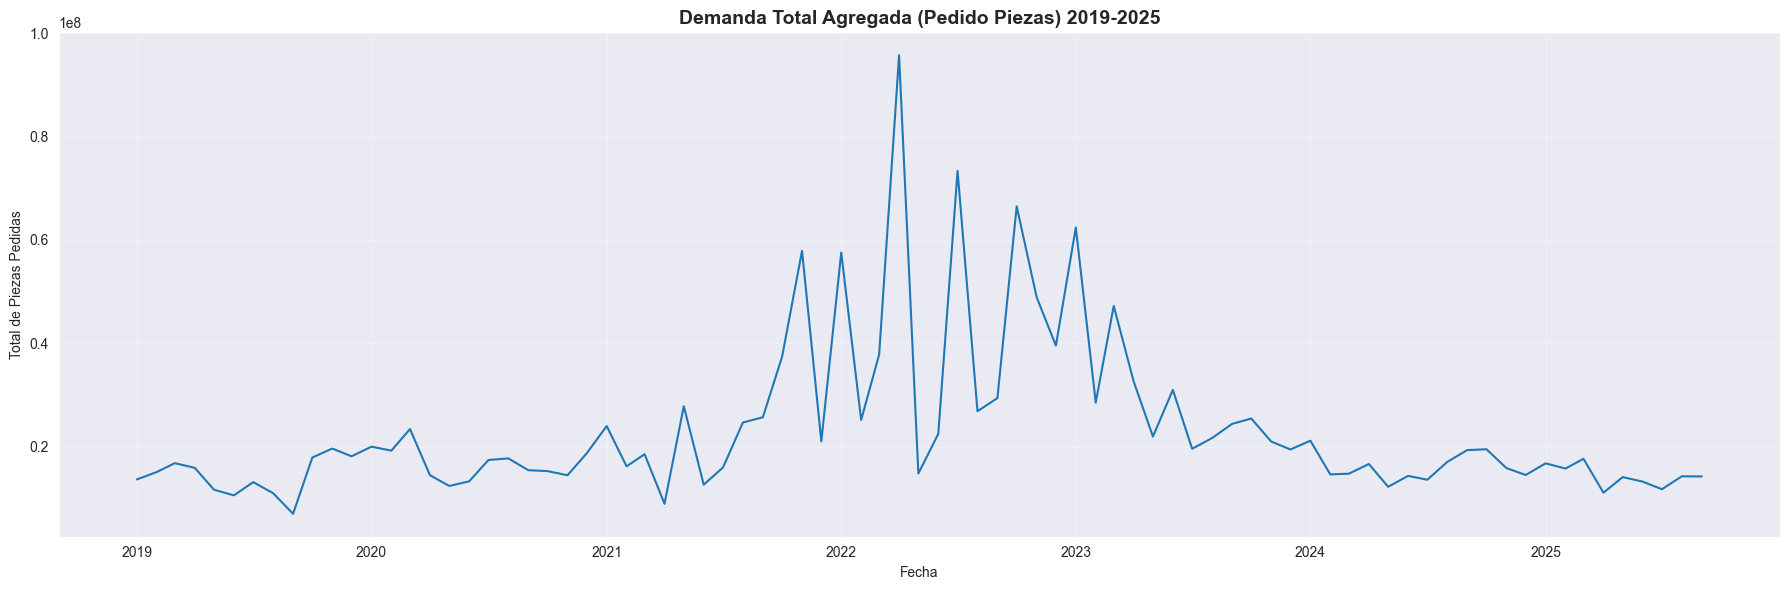


--- Top 10 Productos ---
Producto_Descripcion
ANTIBIOTICO + ANTIFUNGICO CREMA             521680930
ANTIBIOTICO SOLUCIONES INYECTABLE 2         217109895
ANTIPIRETICO SUSPENSION INFANTIL            205972535
ANTIBIOTICO SOLUCIONES INYECTABLE 3         198535220
ANTIBIOTICO SOLUCIONES INYECTABLE ADULTO    150859695
ANALGESICO + ANTIPERETICO TABLETAS 2        107176390
ANALGESICO + ANTIPERETICO TABLETAS 1        101022250
ANTIREUMATOIDE TABLETAS                      76735460
ANTIPIRETICO SOLUCION PEDRIATRICO            70832315
DESCONGESTIONANTE SOLUCION NASAL ADULTO      62867950
Name: Pedido_Piezas, dtype: int64

--- Top 5 Clientes ---
Cliente_Descripcion
Cliente 3        465778950
Cliente 1        409216750
Cliente Otros    271976145
Cliente 2        171057090
Cliente 5        130867555
Name: Pedido_Piezas, dtype: int64


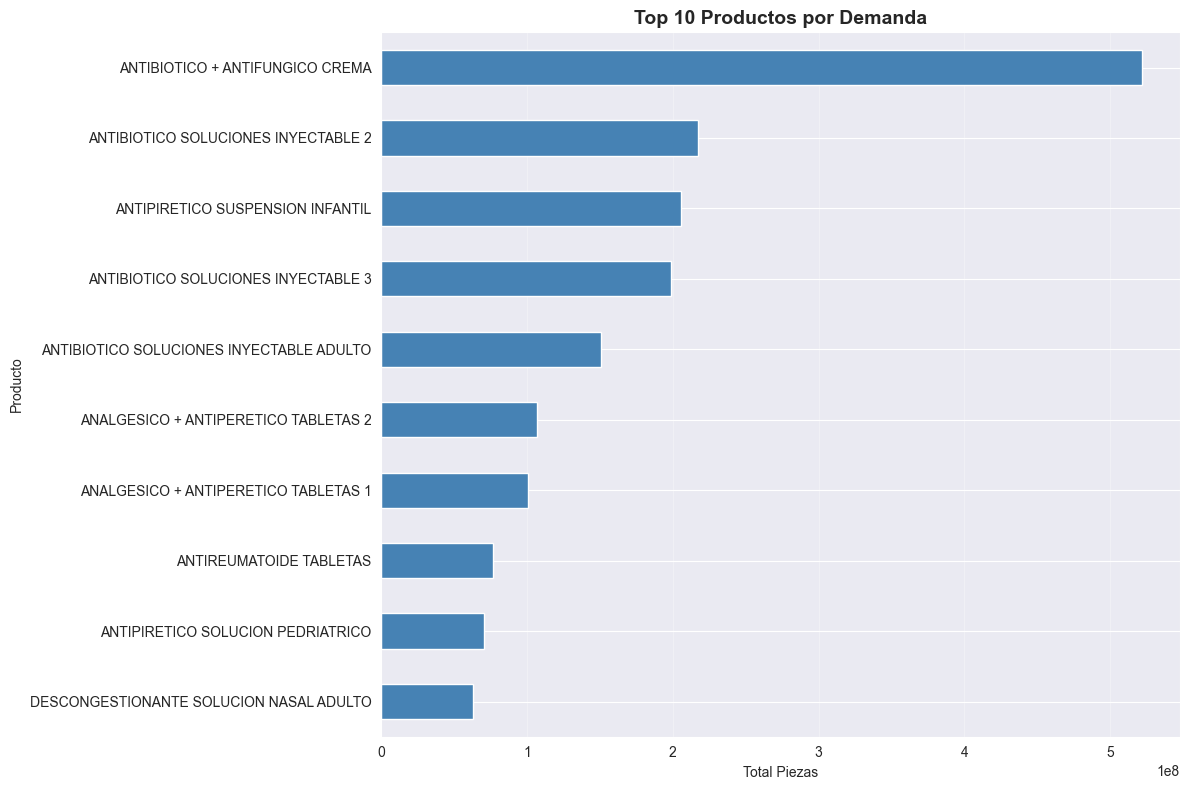

In [7]:
# Agregación total por fecha
df_agregado = df_final.groupby('Fecha')[METRIC_COL].sum().reset_index()

# Gráfico de serie temporal agregada
plt.figure(figsize=(18, 6))
sns.lineplot(data=df_agregado, x='Fecha', y=METRIC_COL)
plt.title('Demanda Total Agregada (Pedido Piezas) 2019-2025', fontsize=14, fontweight='bold')
plt.xlabel('Fecha')
plt.ylabel('Total de Piezas Pedidas')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Identificar Top Productos y Clientes
top_productos = df_final.groupby('Producto_Descripcion')[METRIC_COL].sum().nlargest(NUM_TOP_PRODUCTS)
top_clientes = df_final.groupby('Cliente_Descripcion')[METRIC_COL].sum().nlargest(NUM_TOP_CLIENTS)

print(f"\n--- Top {NUM_TOP_PRODUCTS} Productos ---")
print(top_productos)
print(f"\n--- Top {NUM_TOP_CLIENTS} Clientes ---")
print(top_clientes)

# Visualización de Top Productos
plt.figure(figsize=(12, 8))
top_productos.sort_values().plot(kind='barh', color='steelblue')
plt.title(f'Top {NUM_TOP_PRODUCTS} Productos por Demanda', fontsize=14, fontweight='bold')
plt.xlabel('Total Piezas')
plt.ylabel('Producto')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## FILTRADO DE DATOS PARA MODELADO

✓ Datos filtrados: 4050 filas
✓ Combinaciones únicas: 50


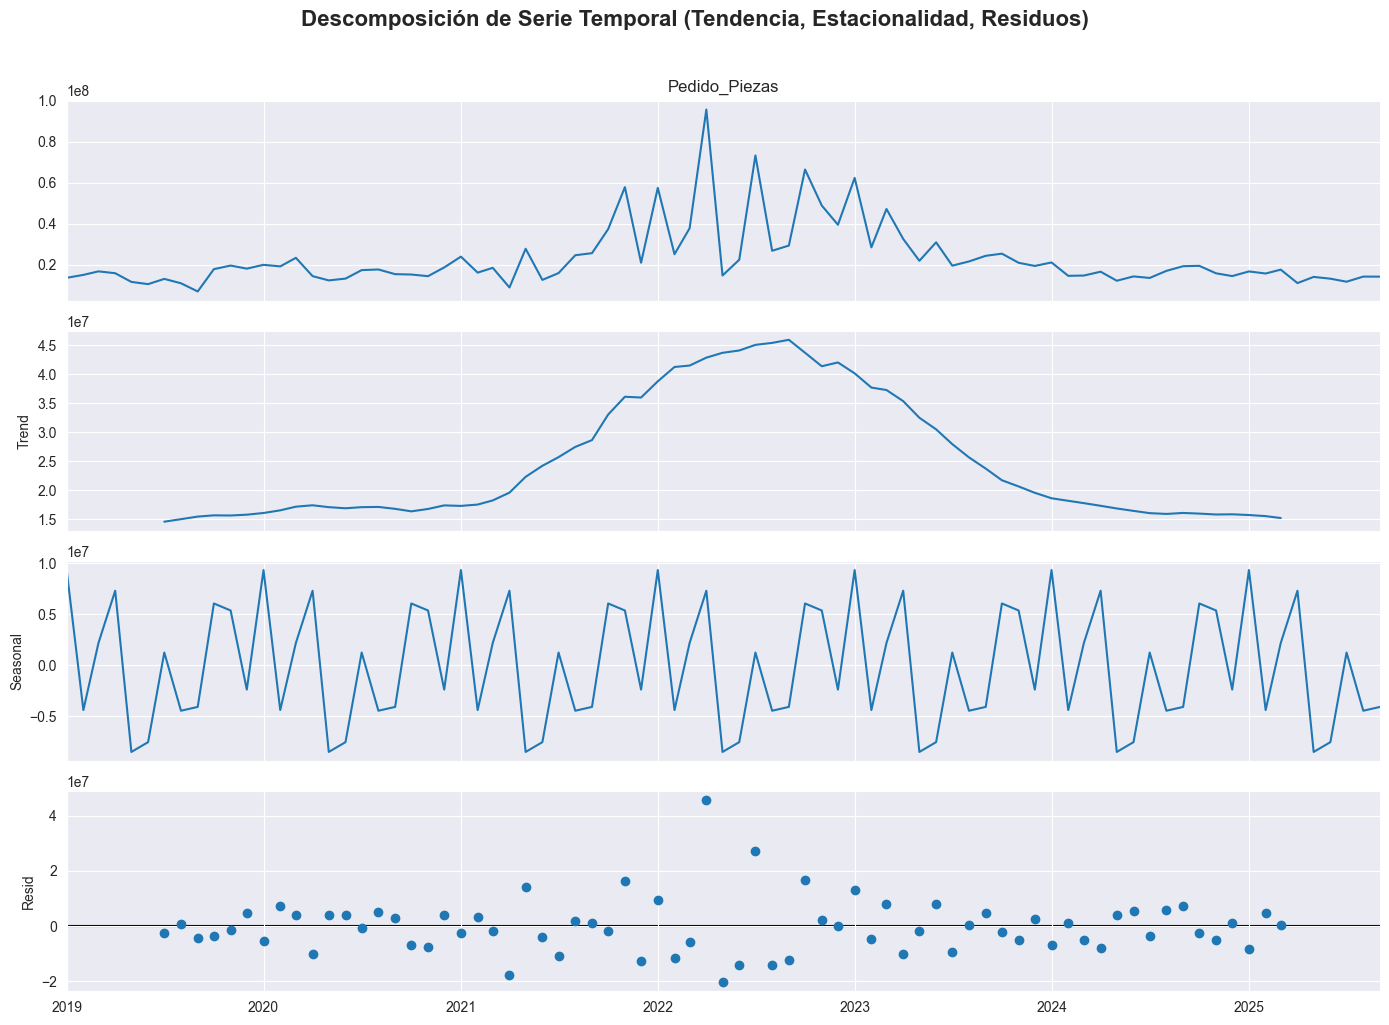

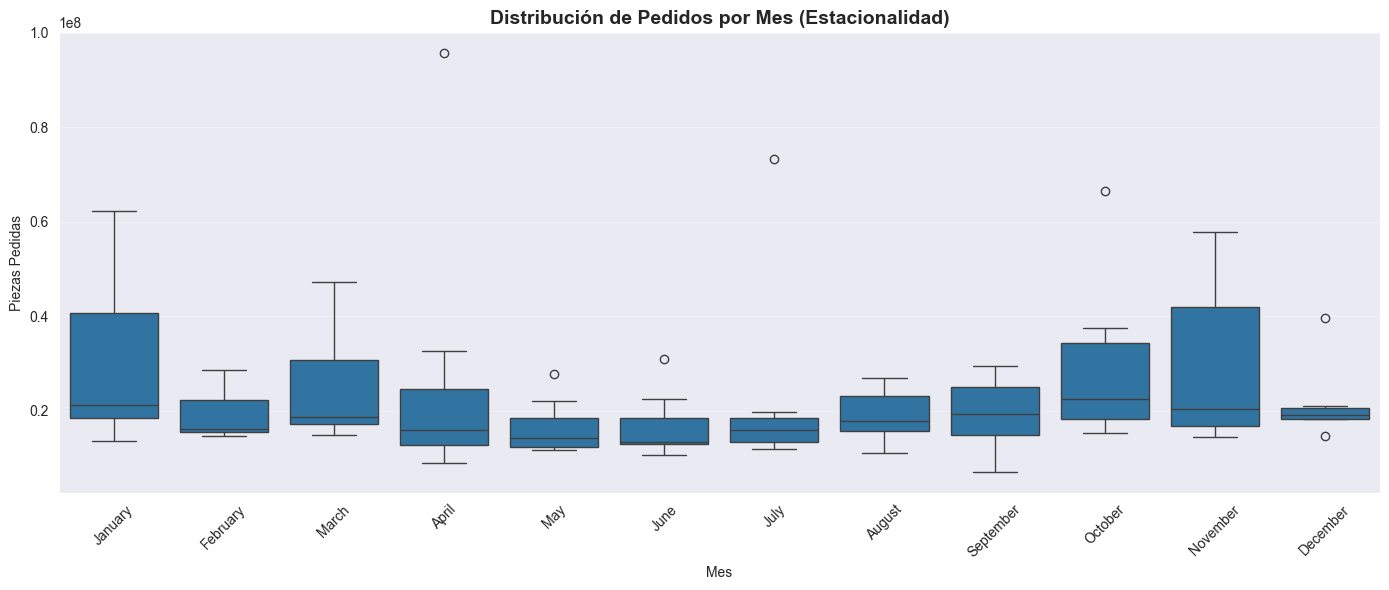

In [8]:
lista_top_productos = top_productos.index
lista_top_clientes = top_clientes.index

df_modelar = df_final[
    (df_final['Producto_Descripcion'].isin(lista_top_productos)) &
    (df_final['Cliente_Descripcion'].isin(lista_top_clientes))
    ].copy()

df_modelar_agg = df_modelar.groupby(ID_COLS + ['Fecha'])[METRIC_COL].sum().reset_index()

print(f"✓ Datos filtrados: {len(df_modelar_agg)} filas")
print(f"✓ Combinaciones únicas: {df_modelar_agg.groupby(ID_COLS).ngroups}")

# SECCIÓN 4: DESCOMPOSICIÓN DE SERIES TEMPORALES
df_agregado_idx = df_agregado.set_index('Fecha')
decomposition = seasonal_decompose(df_agregado_idx[METRIC_COL], model='additive', period=12)

fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.suptitle('Descomposición de Serie Temporal (Tendencia, Estacionalidad, Residuos)',
             y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Análisis de estacionalidad
df_agregado['Año'] = df_agregado['Fecha'].dt.year
df_agregado['Mes'] = df_agregado['Fecha'].dt.month_name()

plt.figure(figsize=(14, 6))
meses_ordenados = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
sns.boxplot(data=df_agregado, x='Mes', y=METRIC_COL, order=meses_ordenados)
plt.title('Distribución de Pedidos por Mes (Estacionalidad)', fontsize=14, fontweight='bold')
plt.xlabel('Mes')
plt.ylabel('Piezas Pedidas')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## PCA Y CLUSTERING

Matriz PCA: 50 combinaciones x 81 fechas
✓ PCA completado. Varianza explicada: PC1=32.3%, PC2=11.5%


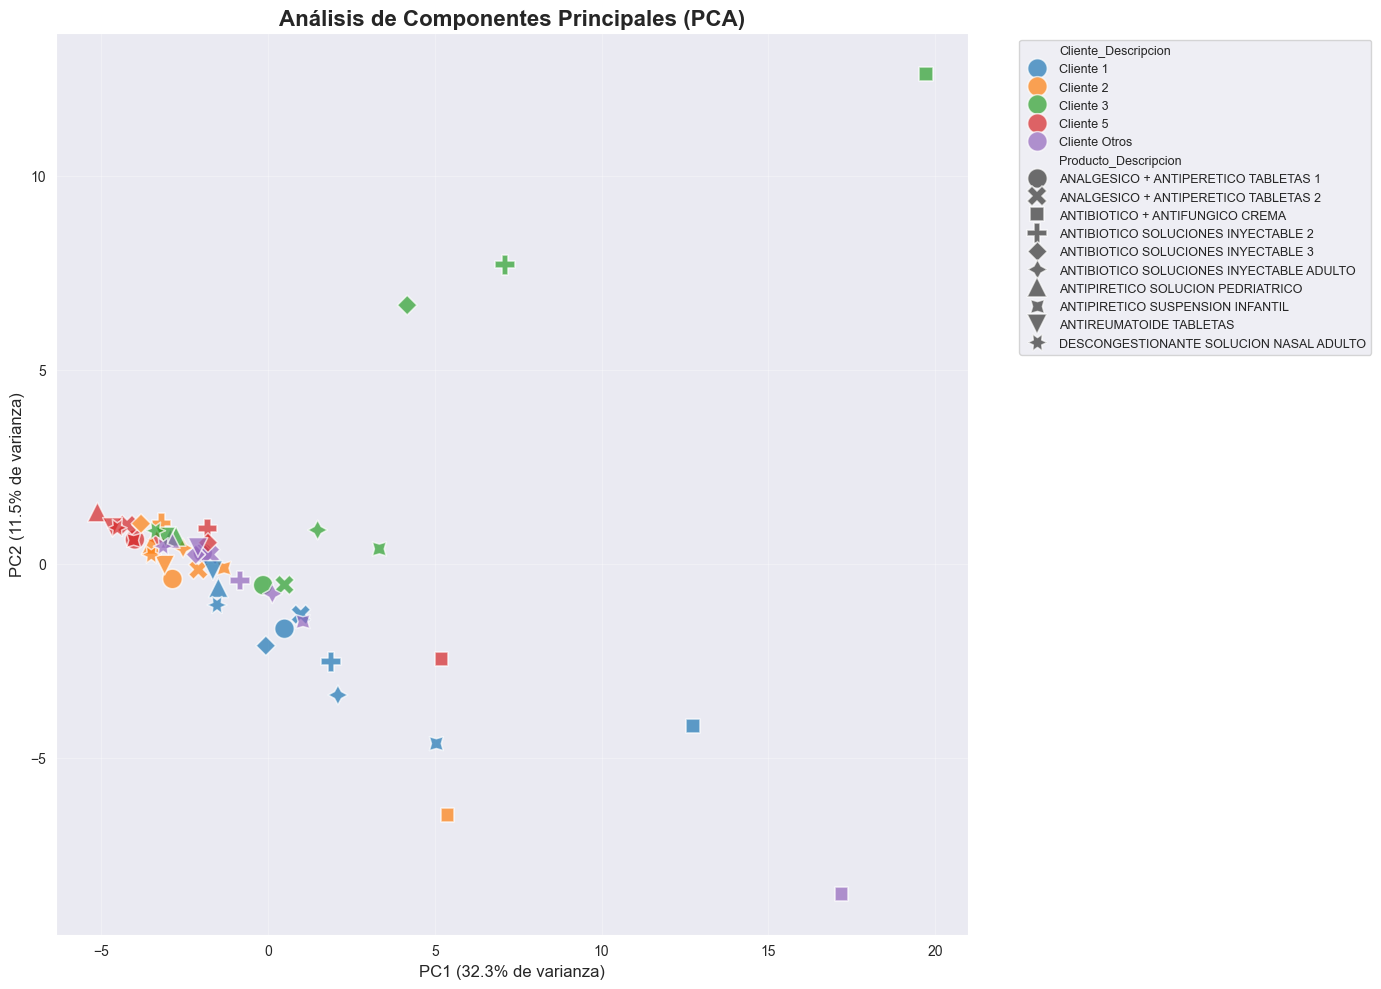

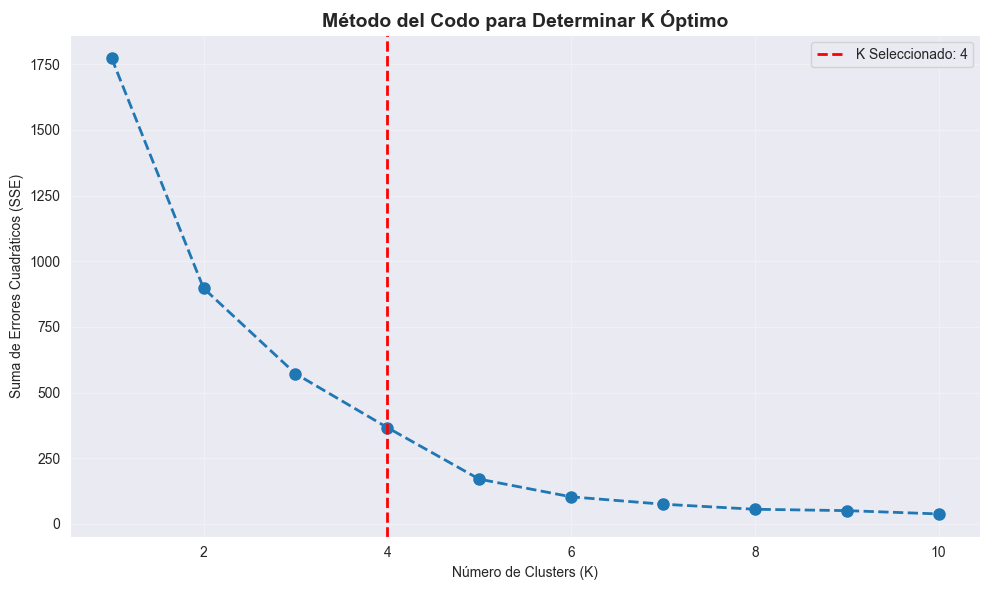

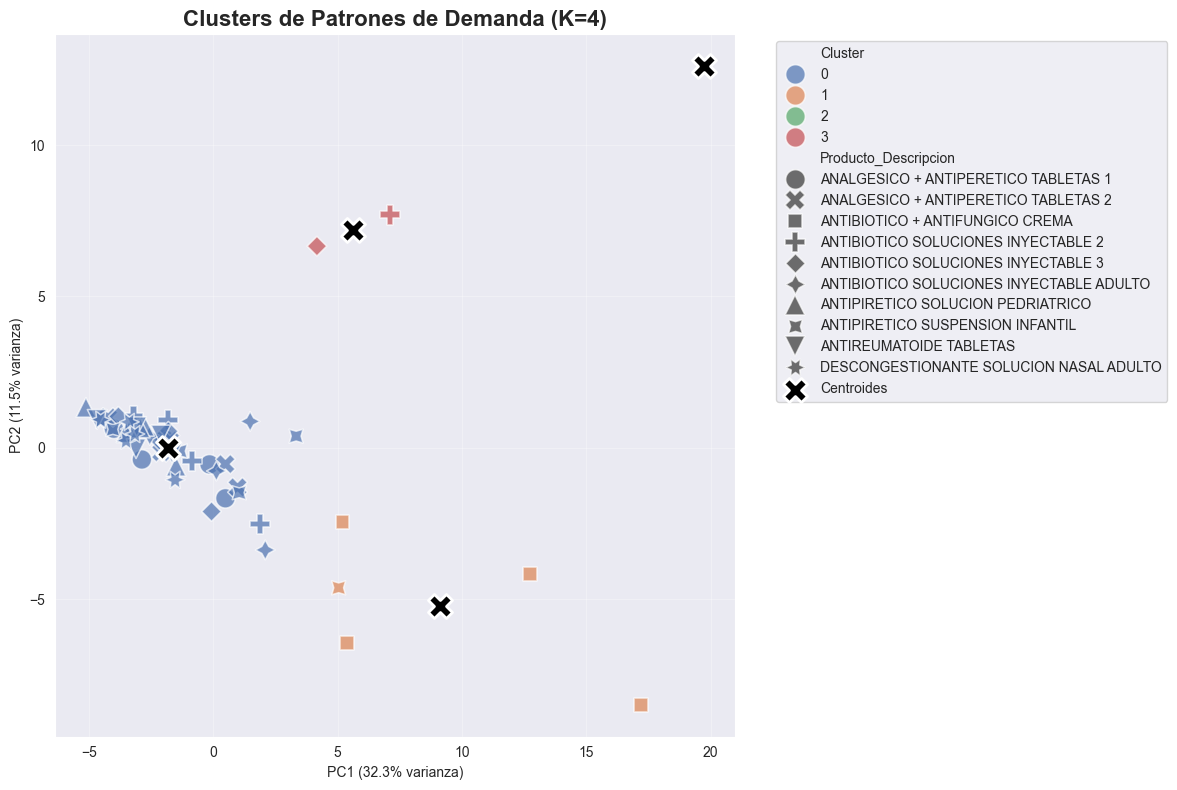


--- Distribución por Cluster ---
Cluster
0    42
1     5
2     1
3     2
Name: count, dtype: int64

--- Características Promedio por Cluster ---
               PC1        PC2
Cluster                      
0        -1.822604  -0.018083
1         9.108911  -5.241704
2        19.729048  12.603508
3         5.637880   7.182258


In [9]:
# Crear matriz pivote
df_wide = df_modelar_agg.pivot_table(
    index=ID_COLS,
    columns='Fecha',
    values=METRIC_COL
).fillna(0)

print(f"Matriz PCA: {df_wide.shape[0]} combinaciones x {df_wide.shape[1]} fechas")

if df_wide.shape[0] < 2:
    print("⚠️ ERROR: Necesitas al menos 2 combinaciones para PCA")
else:
    # Escalar datos
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(df_wide)

    # Aplicar PCA
    pca_model = PCA(n_components=PCA_COMPONENTS)
    principal_components = pca_model.fit_transform(data_scaled)

    # DataFrame de componentes principales
    column_names = [f'PC{i+1}' for i in range(PCA_COMPONENTS)]
    df_pca = pd.DataFrame(
        data=principal_components,
        columns=column_names,
        index=df_wide.index
    ).reset_index()

    variance_explained = pca_model.explained_variance_ratio_
    var_pc1 = variance_explained[0]
    var_pc2 = variance_explained[1] if PCA_COMPONENTS > 1 else 0

    print(f"✓ PCA completado. Varianza explicada: PC1={var_pc1:.1%}, PC2={var_pc2:.1%}")

    # Visualizar PCA
    if PCA_COMPONENTS >= 2:
        plt.figure(figsize=(14, 10))
        scatter = sns.scatterplot(
            data=df_pca,
            x='PC1',
            y='PC2',
            hue='Cliente_Descripcion',
            style='Producto_Descripcion',
            s=200,
            alpha=0.7,
            palette='tab10'
        )
        plt.title('Análisis de Componentes Principales (PCA)', fontsize=16, fontweight='bold')
        plt.xlabel(f'PC1 ({var_pc1:.1%} de varianza)', fontsize=12)
        plt.ylabel(f'PC2 ({var_pc2:.1%} de varianza)', fontsize=12)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

    # K-Means Clustering - Metodo del Codo
    df_pca_cluster = df_pca[['PC1', 'PC2']].copy()
    sse = []
    k_range = range(1, 11)

    for k in k_range:
        kmeans_model = KMeans(n_clusters=k, random_state=42, n_init='auto')
        kmeans_model.fit(df_pca_cluster)
        sse.append(kmeans_model.inertia_)

    # Gráfico del codo
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, sse, marker='o', linestyle='--', linewidth=2, markersize=8)
    plt.axvline(x=K_CLUSTERS, color='r', linestyle='--', linewidth=2, label=f'K Seleccionado: {K_CLUSTERS}')
    plt.title('Método del Codo para Determinar K Óptimo', fontsize=14, fontweight='bold')
    plt.xlabel('Número de Clusters (K)')
    plt.ylabel('Suma de Errores Cuadráticos (SSE)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Aplicar K-Means final
    kmeans_final = KMeans(n_clusters=K_CLUSTERS, random_state=42, n_init='auto')
    df_pca['Cluster'] = kmeans_final.fit_predict(df_pca_cluster)

    # Visualizar clusters
    plt.figure(figsize=(12, 8))
    scatter = sns.scatterplot(
        data=df_pca,
        x='PC1',
        y='PC2',
        hue='Cluster',
        style='Producto_Descripcion',
        palette='deep',
        s=200,
        alpha=0.7
    )
    centers = kmeans_final.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, marker='X',
                edgecolors='white', linewidths=2, label='Centroides')
    plt.title(f'Clusters de Patrones de Demanda (K={K_CLUSTERS})', fontsize=16, fontweight='bold')
    plt.xlabel(f'PC1 ({var_pc1:.1%} varianza)')
    plt.ylabel(f'PC2 ({var_pc2:.1%} varianza)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("\n--- Distribución por Cluster ---")
    print(df_pca['Cluster'].value_counts().sort_index())
    print("\n--- Características Promedio por Cluster ---")
    print(df_pca.groupby('Cluster')[['PC1', 'PC2']].mean())

## PREPARACIÓN DE DATOS PARA MODELADO

In [10]:
# Verificar que hay datos para modelar
combinaciones = df_modelar_agg[ID_COLS].drop_duplicates()

if len(combinaciones) == 0:
    print("⚠️ ERROR: No hay combinaciones disponibles para modelar")
else:
    # Seleccionar una serie de ejemplo para pruebas
    prod_ejemplo, cliente_ejemplo = combinaciones.iloc[0][ID_COLS[0]], combinaciones.iloc[0][ID_COLS[1]]

    print(f"Serie de ejemplo: {prod_ejemplo} | {cliente_ejemplo}")

    df_serie_unica = df_modelar_agg[
        (df_modelar_agg['Producto_Descripcion'] == prod_ejemplo) &
        (df_modelar_agg['Cliente_Descripcion'] == cliente_ejemplo)
        ]

    # Preparar para Prophet
    df_prophet = df_serie_unica[['Fecha', METRIC_COL]].rename(
        columns={'Fecha': 'ds', METRIC_COL: 'y'}
    )

    # División Train/Test
    df_train = df_prophet[df_prophet['ds'] < SPLIT_DATE]
    df_test = df_prophet[df_prophet['ds'] >= SPLIT_DATE]

    print(f"✓ Entrenamiento: {len(df_train)} meses | Prueba: {len(df_test)} meses")

# Definir y_true_test (se usa en todos los modelos)
y_true_test = df_test['y'].values

Serie de ejemplo: ANALGESICO + ANTIPERETICO TABLETAS 1 | Cliente 1
✓ Entrenamiento: 72 meses | Prueba: 9 meses


## MODELADO INDIVIDUAL - PROPHET

23:53:16 - cmdstanpy - INFO - Chain [1] start processing
23:53:18 - cmdstanpy - INFO - Chain [1] done processing


✓ RMSE Prophet: 156091.14


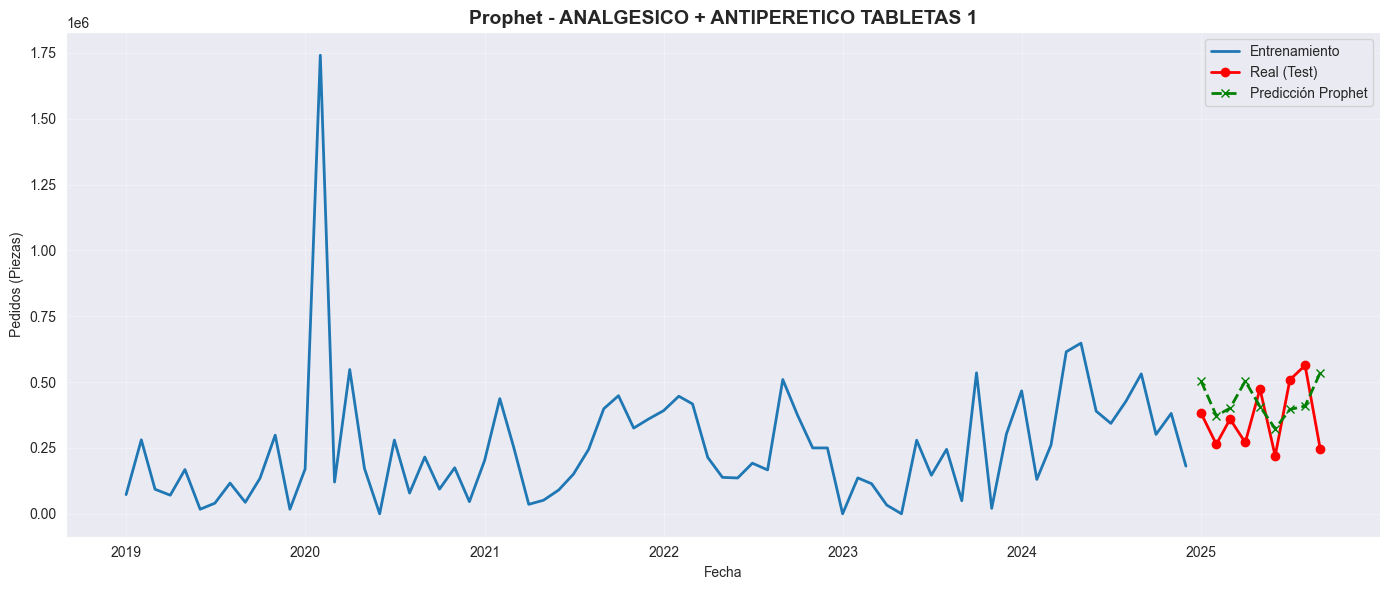

In [11]:
try:
    m_prophet = Prophet(
        changepoint_prior_scale=0.5,
        seasonality_mode='additive',
        seasonality_prior_scale=10.0
    )
    if COUNTRY_HOLIDAYS:
        m_prophet.add_country_holidays(country_name=COUNTRY_HOLIDAYS)
        m_prophet.fit(df_train)

        # Predicción en test
        future_prophet = pd.DataFrame({'ds': df_test['ds']})
        forecast_prophet = m_prophet.predict(future_prophet)
        y_pred_prophet_test = forecast_prophet['yhat'].values

        rmse_prophet = np.sqrt(mean_squared_error(y_true_test, y_pred_prophet_test))

        print(f"✓ RMSE Prophet: {rmse_prophet:.2f}")

        # Visualización
        plt.figure(figsize=(14, 6))
        plt.plot(df_train['ds'], df_train['y'], label='Entrenamiento', linewidth=2)
        plt.plot(df_test['ds'], df_test['y'], label='Real (Test)', color='red', marker='o', linewidth=2)
        plt.plot(df_test['ds'], y_pred_prophet_test, label='Predicción Prophet',
                 color='green', linestyle='--', marker='x', linewidth=2)
        plt.title(f'Prophet - {prod_ejemplo}', fontsize=14, fontweight='bold')
        plt.xlabel('Fecha')
        plt.ylabel('Pedidos (Piezas)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
except Exception as e:
    print(f"⚠️ Error en Prophet: {e}")
    y_pred_prophet_test = np.full(len(df_test), np.nan)
    rmse_prophet = np.nan

## MODELADO INDIVIDUAL - SARIMA

✓ RMSE SARIMA: 119766.63


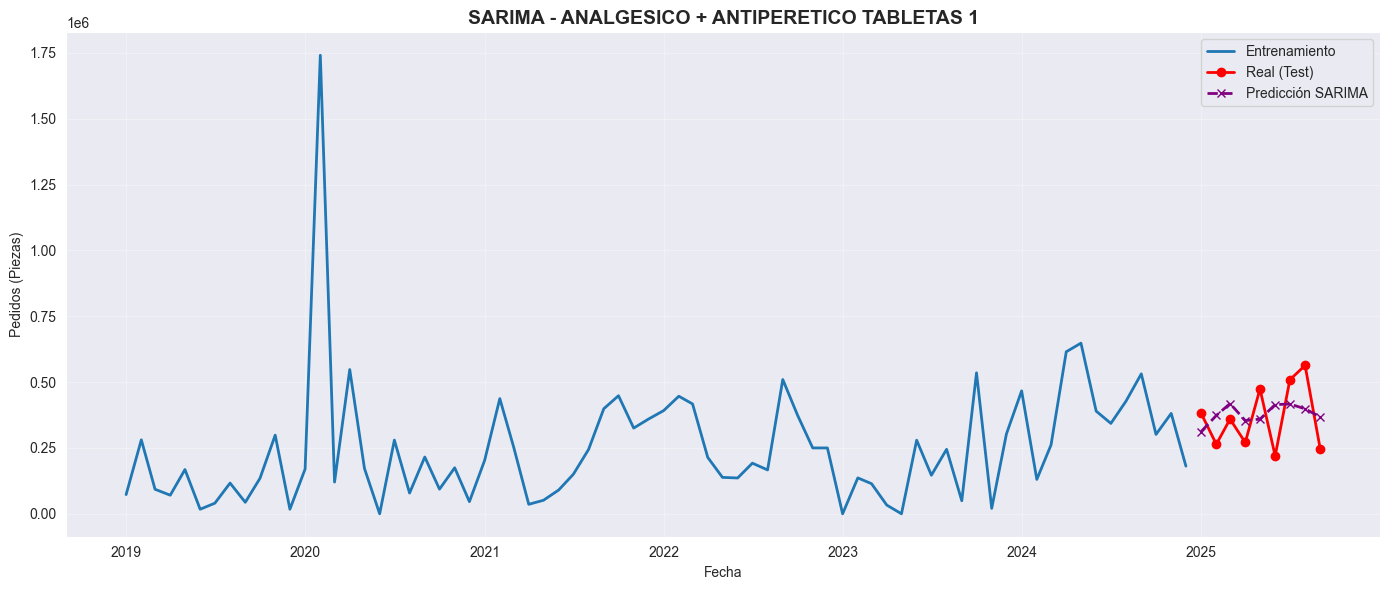

In [12]:
try:
    df_train_indexed = df_train.set_index('ds')
    df_train_indexed.index = pd.to_datetime(df_train_indexed.index)
    df_train_indexed = df_train_indexed.asfreq('MS')

    arima_model = SARIMAX(
        df_train_indexed['y'],
        order=SARIMA_ORDER,
        seasonal_order=SARIMA_SEASONAL_ORDER,
        enforce_stationarity=False,
        enforce_invertibility=False
    )

    arima_results = arima_model.fit(disp=False)

    # Predicción
    start_date = df_test['ds'].min()
    end_date = df_test['ds'].max()
    predictions_sarima = arima_results.predict(start=start_date, end=end_date, dynamic=False)
    y_pred_sarima_test = predictions_sarima.values

    rmse_sarima = np.sqrt(mean_squared_error(y_true_test, y_pred_sarima_test))

    print(f"✓ RMSE SARIMA: {rmse_sarima:.2f}")

    # Visualización
    plt.figure(figsize=(14, 6))
    plt.plot(df_train['ds'], df_train['y'], label='Entrenamiento', linewidth=2)
    plt.plot(df_test['ds'], df_test['y'], label='Real (Test)', color='red', marker='o', linewidth=2)
    plt.plot(df_test['ds'], y_pred_sarima_test, label='Predicción SARIMA',
             color='purple', linestyle='--', marker='x', linewidth=2)
    plt.title(f'SARIMA - {prod_ejemplo}', fontsize=14, fontweight='bold')
    plt.xlabel('Fecha')
    plt.ylabel('Pedidos (Piezas)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"⚠️ Error en SARIMA: {e}")
    y_pred_sarima_test = np.full(len(df_test), np.nan)
    rmse_sarima = np.nan

## MODELADO INDIVIDUAL - RANDOM FOREST

✓ RMSE Random Forest: 148898.06

--- Importancia de Características ---
year                0.501534
dayofyear           0.287322
month               0.179058
is_holiday_month    0.032086
dtype: float64


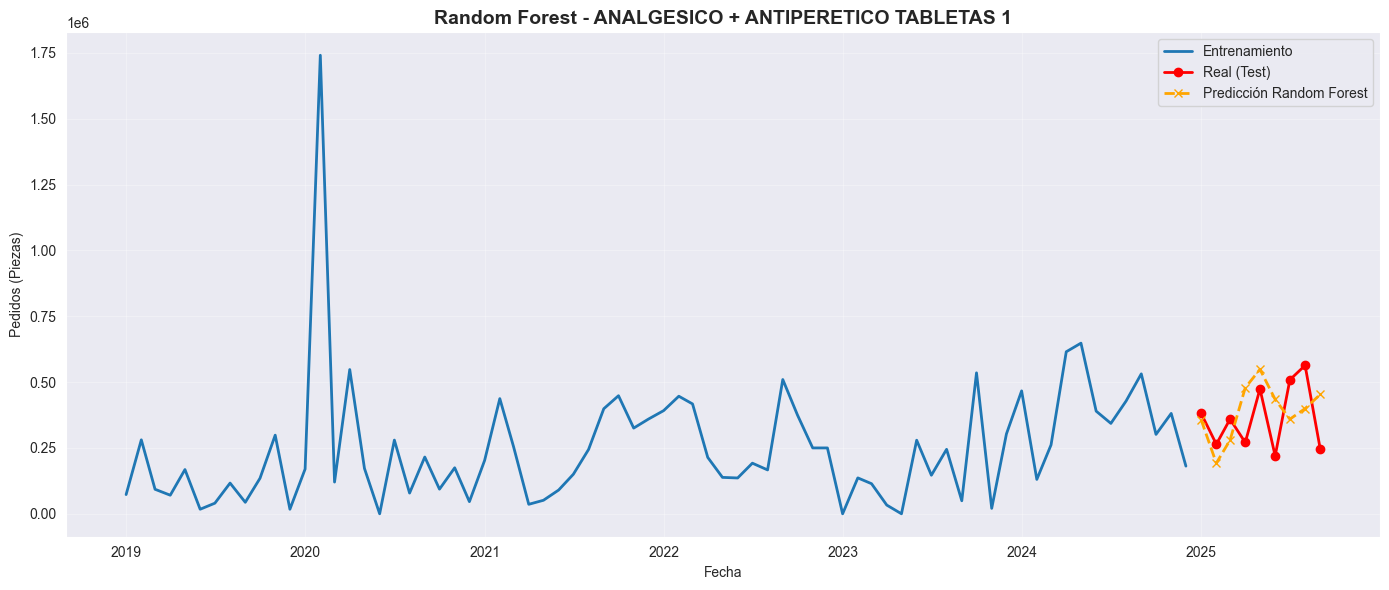

In [13]:
def create_time_features(df):
    df = df.copy()
    df['year'] = df['ds'].dt.year
    df['month'] = df['ds'].dt.month
    df['dayofyear'] = df['ds'].dt.dayofyear
    return df

def create_holiday_features(df, country, years):
    df = df.copy()
    if country:
        holidays = make_holidays_df(year_list=years, country=country)
        holiday_months = holidays['ds'].dt.to_period('M').unique()
        df['is_holiday_month'] = df['ds'].dt.to_period('M').isin(holiday_months).astype(int)
    else:
        df['is_holiday_month'] = 0
    return df
try:
    df_train_ml = create_time_features(df_train.copy())
    df_test_ml = create_time_features(df_test.copy())

    all_years = pd.concat([df_train_ml['ds'], df_test_ml['ds']]).dt.year.unique()
    df_train_ml = create_holiday_features(df_train_ml, COUNTRY_HOLIDAYS, all_years)
    df_test_ml = create_holiday_features(df_test_ml, COUNTRY_HOLIDAYS, all_years)

    X_train = df_train_ml[RF_FEATURES]
    y_train = df_train_ml['y']
    X_test = df_test_ml[RF_FEATURES]
    y_test_ml = df_test_ml['y']

    ml_model = RandomForestRegressor(
        n_estimators=RF_N_ESTIMATORS,
        max_depth=RF_MAX_DEPTH,
        random_state=42,
        n_jobs=-1
    )
    ml_model.fit(X_train, y_train)

    y_pred_rf_test = ml_model.predict(X_test)
    rmse_rf = np.sqrt(mean_squared_error(y_test_ml, y_pred_rf_test))

    print(f"✓ RMSE Random Forest: {rmse_rf:.2f}")

    # Importancia de características
    feature_importance = pd.Series(ml_model.feature_importances_, index=RF_FEATURES).sort_values(ascending=False)
    print("\n--- Importancia de Características ---")
    print(feature_importance)

    # Visualización
    plt.figure(figsize=(14, 6))
    plt.plot(df_train['ds'], df_train['y'], label='Entrenamiento', linewidth=2)
    plt.plot(df_test['ds'], y_test_ml, label='Real (Test)', color='red', marker='o', linewidth=2)
    plt.plot(df_test['ds'], y_pred_rf_test, label='Predicción Random Forest',
             color='orange', linestyle='--', marker='x', linewidth=2)
    plt.title(f'Random Forest - {prod_ejemplo}', fontsize=14, fontweight='bold')
    plt.xlabel('Fecha')
    plt.ylabel('Pedidos (Piezas)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"⚠️ Error en Random Forest: {e}")
    y_pred_rf_test = np.full(len(df_test), np.nan)
    rmse_rf = np.nan

## COMPARACIÓN DE MODELOS Y ENSEMBLE POR PROMEDIO SIMPLE

✓ RMSE Ensemble: 127591.48

--- Comparación Final ---
             Modelo          RMSE
             SARIMA 119766.632721
Ensemble (Promedio) 127591.477107
      Random Forest 148898.064638
            Prophet 156091.135214


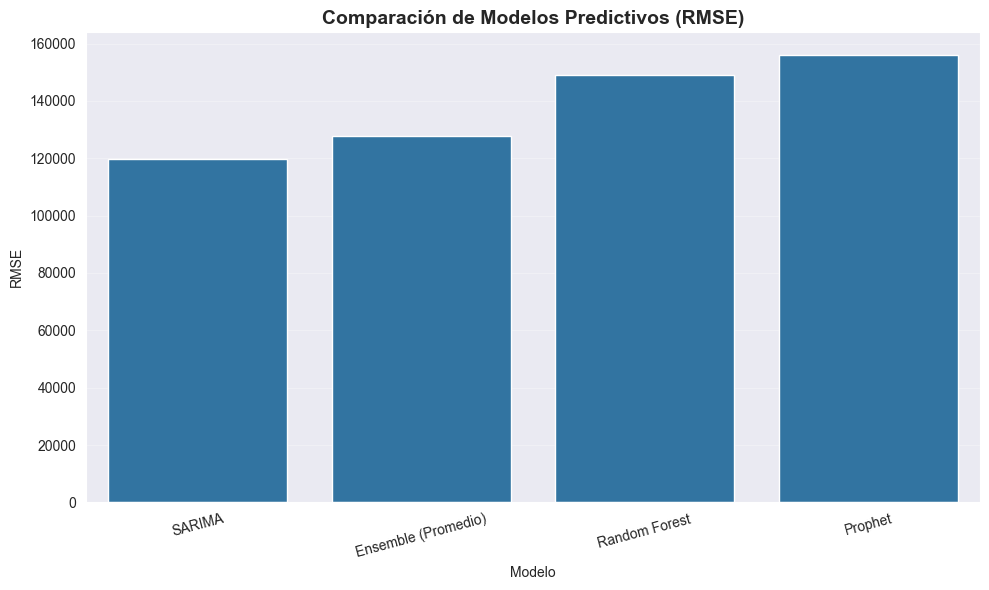

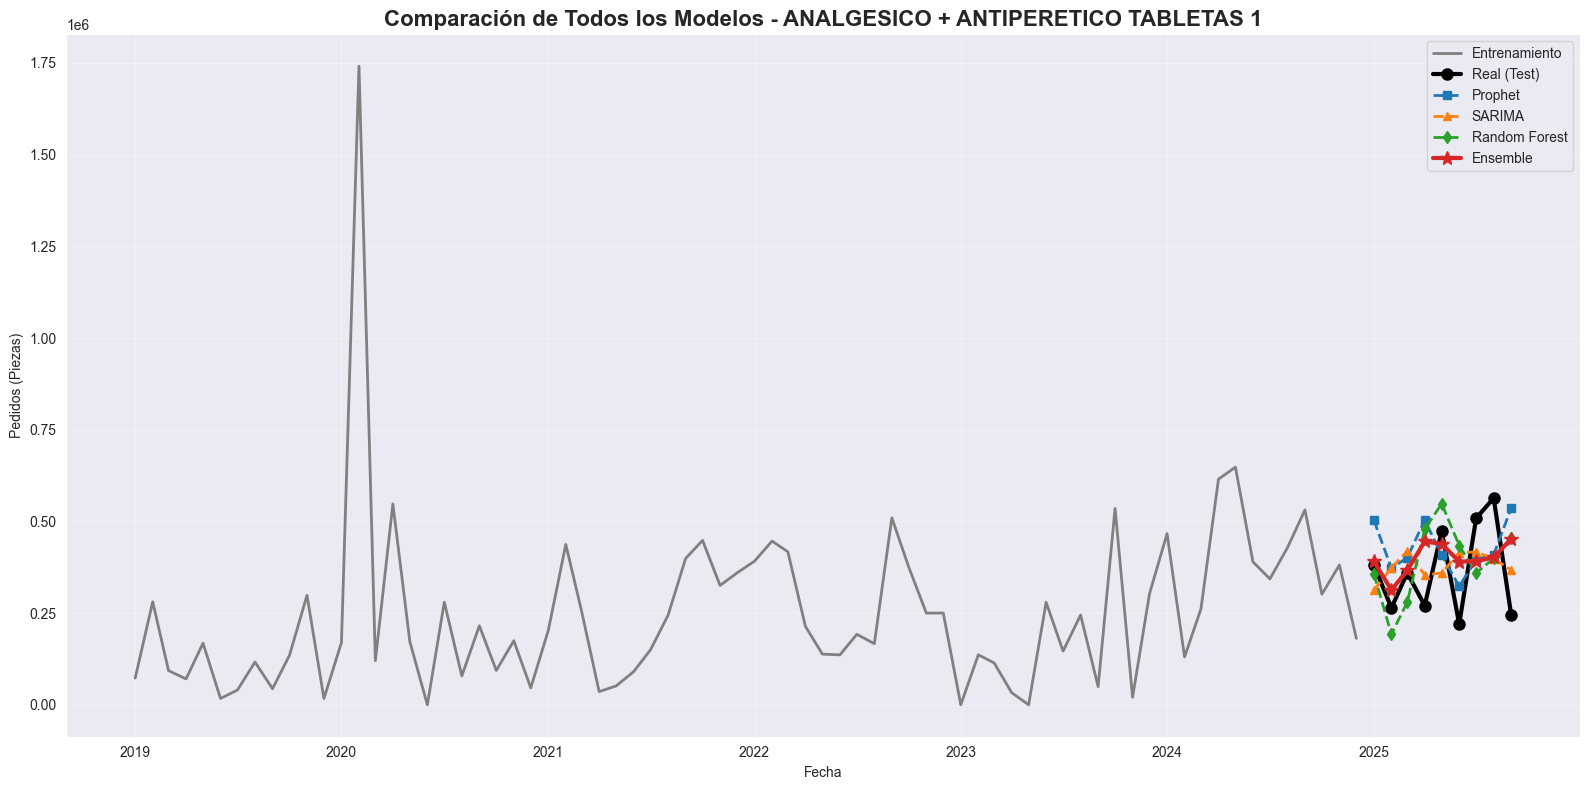

In [14]:
y_pred_ensemble = np.nanmean([y_pred_rf_test, y_pred_prophet_test, y_pred_sarima_test], axis=0)
rmse_ensemble = np.sqrt(mean_squared_error(y_true_test, y_pred_ensemble))

print(f"✓ RMSE Ensemble: {rmse_ensemble:.2f}")

# Tabla de comparación
df_comparacion = pd.DataFrame({
    'Modelo': ['Random Forest', 'SARIMA', 'Prophet', 'Ensemble (Promedio)'],
    'RMSE': [rmse_rf, rmse_sarima, rmse_prophet, rmse_ensemble]
}).sort_values(by='RMSE')

print("\n--- Comparación Final ---")
print(df_comparacion.to_string(index=False))

# Visualización comparativa
plt.figure(figsize=(10, 6))
sns.barplot(data=df_comparacion, x='Modelo', y='RMSE')
plt.title('Comparación de Modelos Predictivos (RMSE)', fontsize=14, fontweight='bold')
plt.xlabel('Modelo')
plt.ylabel('RMSE')
plt.xticks(rotation=15)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Visualización de todas las predicciones
plt.figure(figsize=(16, 8))
plt.plot(df_train['ds'], df_train['y'], label='Entrenamiento', linewidth=2, color='gray')
plt.plot(df_test['ds'], y_true_test, label='Real (Test)', color='black', marker='o', linewidth=3, markersize=8)
plt.plot(df_test['ds'], y_pred_prophet_test, label='Prophet', linestyle='--', marker='s', linewidth=2)
plt.plot(df_test['ds'], y_pred_sarima_test, label='SARIMA', linestyle='--', marker='^', linewidth=2)
plt.plot(df_test['ds'], y_pred_rf_test, label='Random Forest', linestyle='--', marker='d', linewidth=2)
plt.plot(df_test['ds'], y_pred_ensemble, label='Ensemble', linestyle='-', marker='*', linewidth=3, markersize=10)
plt.title(f'Comparación de Todos los Modelos - {prod_ejemplo}', fontsize=16, fontweight='bold')
plt.xlabel('Fecha')
plt.ylabel('Pedidos (Piezas)')
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## MODELADO ENSEMBLE POR LOTES

In [15]:
lista_pronosticos = []
total_combinaciones = len(combinaciones)

for idx, row in combinaciones.iterrows():
    producto = row['Producto_Descripcion']
    cliente = row['Cliente_Descripcion']

    # Aislar serie
    df_serie = df_modelar_agg[
        (df_modelar_agg['Producto_Descripcion'] == producto) &
        (df_modelar_agg['Cliente_Descripcion'] == cliente)
        ]

    df_prophet_prep = df_serie[['Fecha', METRIC_COL]].rename(columns={'Fecha': 'ds', METRIC_COL: 'y'})

    # Control de calidad
    if df_prophet_prep[df_prophet_prep['y'] > 0].shape[0] < MIN_DATA_POINTS_FOR_MODELING:
        print(f"  ⊗ OMITIDO (datos insuficientes): {producto} | {cliente}")
        continue

    df_train_full = df_prophet_prep.copy()

    # Crear fechas futuras
    last_date = df_train_full['ds'].max()
    future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=FORECAST_PERIODS, freq='MS')
    future_df = pd.DataFrame({'ds': future_dates})

    # Prophet
    try:
        m = Prophet(seasonality_mode='additive')
        if COUNTRY_HOLIDAYS:
            m.add_country_holidays(country_name=COUNTRY_HOLIDAYS)
        m.fit(df_train_full)
        forecast_p = m.predict(future_df)
        yhat_p = forecast_p['yhat'].values
    except:
        yhat_p = np.full(FORECAST_PERIODS, np.nan)

    # Random Forest
    try:
        df_train_rf = create_time_features(df_train_full.copy())
        df_future_rf = create_time_features(future_df.copy())

        all_yrs = pd.concat([df_train_rf['ds'], df_future_rf['ds']]).dt.year.unique()
        df_train_rf = create_holiday_features(df_train_rf, COUNTRY_HOLIDAYS, all_yrs)
        df_future_rf = create_holiday_features(df_future_rf, COUNTRY_HOLIDAYS, all_yrs)

        rf = RandomForestRegressor(n_estimators=RF_N_ESTIMATORS, max_depth=RF_MAX_DEPTH, random_state=42, n_jobs=-1)
        rf.fit(df_train_rf[RF_FEATURES], df_train_rf['y'])
        yhat_rf = rf.predict(df_future_rf[RF_FEATURES])
    except:
        yhat_rf = np.full(FORECAST_PERIODS, np.nan)

    # SARIMA
    try:
        df_train_idx = df_train_full.set_index('ds')
        df_train_idx = df_train_idx.asfreq('MS')

        sarima = SARIMAX(df_train_idx['y'], order=SARIMA_ORDER,
                         seasonal_order=SARIMA_SEASONAL_ORDER,
                         enforce_stationarity=False, enforce_invertibility=False)
        sarima_fit = sarima.fit(disp=False)
        forecast_s = sarima_fit.get_forecast(steps=FORECAST_PERIODS)
        yhat_s = forecast_s.predicted_mean.values
    except:
        yhat_s = np.full(FORECAST_PERIODS, np.nan)

    # Ensemble (promedio)
    yhat_ensemble = np.nanmean([yhat_p, yhat_rf, yhat_s], axis=0)

    # Usar intervalos de Prophet (simplificación)
    try:
        yhat_min = forecast_p['yhat_lower'].values
        yhat_max = forecast_p['yhat_upper'].values
    except:
        yhat_min = yhat_ensemble * 0.8
        yhat_max = yhat_ensemble * 1.2

    # Consolidar resultado
    pronostico = pd.DataFrame({
        'ds': future_dates,
        'yhat': yhat_ensemble,
        'yhat_lower': yhat_min,
        'yhat_upper': yhat_max,
        'Producto_Descripcion': producto,
        'Cliente_Descripcion': cliente
    })

    lista_pronosticos.append(pronostico)

    if (idx + 1) % 5 == 0 or (idx + 1) == total_combinaciones:
        print(f"  ✓ Progreso: {idx + 1}/{total_combinaciones} combinaciones procesadas")

23:53:24 - cmdstanpy - INFO - Chain [1] start processing
23:53:25 - cmdstanpy - INFO - Chain [1] done processing
23:53:26 - cmdstanpy - INFO - Chain [1] start processing
23:53:27 - cmdstanpy - INFO - Chain [1] done processing
23:53:28 - cmdstanpy - INFO - Chain [1] start processing
23:53:29 - cmdstanpy - INFO - Chain [1] done processing
23:53:30 - cmdstanpy - INFO - Chain [1] start processing
23:53:31 - cmdstanpy - INFO - Chain [1] done processing
23:53:32 - cmdstanpy - INFO - Chain [1] start processing
23:53:33 - cmdstanpy - INFO - Chain [1] done processing


  ✓ Progreso: 325/50 combinaciones procesadas


23:53:35 - cmdstanpy - INFO - Chain [1] start processing
23:53:36 - cmdstanpy - INFO - Chain [1] done processing
23:53:37 - cmdstanpy - INFO - Chain [1] start processing
23:53:38 - cmdstanpy - INFO - Chain [1] done processing
23:53:42 - cmdstanpy - INFO - Chain [1] start processing
23:53:44 - cmdstanpy - INFO - Chain [1] done processing
23:53:46 - cmdstanpy - INFO - Chain [1] start processing
23:53:47 - cmdstanpy - INFO - Chain [1] done processing
23:53:49 - cmdstanpy - INFO - Chain [1] start processing
23:53:50 - cmdstanpy - INFO - Chain [1] done processing


  ✓ Progreso: 730/50 combinaciones procesadas


23:53:52 - cmdstanpy - INFO - Chain [1] start processing
23:53:53 - cmdstanpy - INFO - Chain [1] done processing
23:53:54 - cmdstanpy - INFO - Chain [1] start processing
23:53:55 - cmdstanpy - INFO - Chain [1] done processing
23:54:01 - cmdstanpy - INFO - Chain [1] start processing
23:54:05 - cmdstanpy - INFO - Chain [1] done processing
23:54:09 - cmdstanpy - INFO - Chain [1] start processing
23:54:09 - cmdstanpy - INFO - Chain [1] done processing
23:54:10 - cmdstanpy - INFO - Chain [1] start processing
23:54:11 - cmdstanpy - INFO - Chain [1] done processing


  ✓ Progreso: 1135/50 combinaciones procesadas


23:54:12 - cmdstanpy - INFO - Chain [1] start processing
23:54:13 - cmdstanpy - INFO - Chain [1] done processing
23:54:14 - cmdstanpy - INFO - Chain [1] start processing
23:54:15 - cmdstanpy - INFO - Chain [1] done processing
23:54:16 - cmdstanpy - INFO - Chain [1] start processing
23:54:17 - cmdstanpy - INFO - Chain [1] done processing
23:54:18 - cmdstanpy - INFO - Chain [1] start processing
23:54:19 - cmdstanpy - INFO - Chain [1] done processing
23:54:21 - cmdstanpy - INFO - Chain [1] start processing
23:54:23 - cmdstanpy - INFO - Chain [1] done processing


  ✓ Progreso: 1540/50 combinaciones procesadas


23:54:24 - cmdstanpy - INFO - Chain [1] start processing
23:54:26 - cmdstanpy - INFO - Chain [1] done processing
23:54:28 - cmdstanpy - INFO - Chain [1] start processing
23:54:30 - cmdstanpy - INFO - Chain [1] done processing
23:54:32 - cmdstanpy - INFO - Chain [1] start processing
23:54:35 - cmdstanpy - INFO - Chain [1] done processing
23:54:37 - cmdstanpy - INFO - Chain [1] start processing
23:54:38 - cmdstanpy - INFO - Chain [1] done processing
23:54:40 - cmdstanpy - INFO - Chain [1] start processing
23:54:42 - cmdstanpy - INFO - Chain [1] done processing


  ✓ Progreso: 1945/50 combinaciones procesadas


23:54:43 - cmdstanpy - INFO - Chain [1] start processing
23:54:46 - cmdstanpy - INFO - Chain [1] done processing
23:54:48 - cmdstanpy - INFO - Chain [1] start processing
23:54:50 - cmdstanpy - INFO - Chain [1] done processing
23:54:51 - cmdstanpy - INFO - Chain [1] start processing
23:54:53 - cmdstanpy - INFO - Chain [1] done processing
23:54:55 - cmdstanpy - INFO - Chain [1] start processing
23:54:58 - cmdstanpy - INFO - Chain [1] done processing
23:55:00 - cmdstanpy - INFO - Chain [1] start processing
23:55:01 - cmdstanpy - INFO - Chain [1] done processing


  ✓ Progreso: 2350/50 combinaciones procesadas


23:55:02 - cmdstanpy - INFO - Chain [1] start processing
23:55:03 - cmdstanpy - INFO - Chain [1] done processing
23:55:04 - cmdstanpy - INFO - Chain [1] start processing
23:55:06 - cmdstanpy - INFO - Chain [1] done processing
23:55:08 - cmdstanpy - INFO - Chain [1] start processing
23:55:09 - cmdstanpy - INFO - Chain [1] done processing
23:55:10 - cmdstanpy - INFO - Chain [1] start processing
23:55:11 - cmdstanpy - INFO - Chain [1] done processing
23:55:13 - cmdstanpy - INFO - Chain [1] start processing
23:55:15 - cmdstanpy - INFO - Chain [1] done processing


  ✓ Progreso: 2755/50 combinaciones procesadas


23:55:18 - cmdstanpy - INFO - Chain [1] start processing
23:55:20 - cmdstanpy - INFO - Chain [1] done processing
23:55:22 - cmdstanpy - INFO - Chain [1] start processing
23:55:23 - cmdstanpy - INFO - Chain [1] done processing
23:55:25 - cmdstanpy - INFO - Chain [1] start processing
23:55:26 - cmdstanpy - INFO - Chain [1] done processing
23:55:29 - cmdstanpy - INFO - Chain [1] start processing
23:55:30 - cmdstanpy - INFO - Chain [1] done processing
23:55:31 - cmdstanpy - INFO - Chain [1] start processing
23:55:34 - cmdstanpy - INFO - Chain [1] done processing


  ✓ Progreso: 3160/50 combinaciones procesadas


23:55:38 - cmdstanpy - INFO - Chain [1] start processing
23:55:40 - cmdstanpy - INFO - Chain [1] done processing
23:55:41 - cmdstanpy - INFO - Chain [1] start processing
23:55:42 - cmdstanpy - INFO - Chain [1] done processing
23:55:44 - cmdstanpy - INFO - Chain [1] start processing
23:55:46 - cmdstanpy - INFO - Chain [1] done processing
23:55:52 - cmdstanpy - INFO - Chain [1] start processing
23:55:55 - cmdstanpy - INFO - Chain [1] done processing
23:55:58 - cmdstanpy - INFO - Chain [1] start processing
23:55:59 - cmdstanpy - INFO - Chain [1] done processing


  ✓ Progreso: 3565/50 combinaciones procesadas


23:56:01 - cmdstanpy - INFO - Chain [1] start processing
23:56:02 - cmdstanpy - INFO - Chain [1] done processing
23:56:03 - cmdstanpy - INFO - Chain [1] start processing
23:56:04 - cmdstanpy - INFO - Chain [1] done processing
23:56:05 - cmdstanpy - INFO - Chain [1] start processing
23:56:06 - cmdstanpy - INFO - Chain [1] done processing
23:56:07 - cmdstanpy - INFO - Chain [1] start processing
23:56:08 - cmdstanpy - INFO - Chain [1] done processing
23:56:09 - cmdstanpy - INFO - Chain [1] start processing
23:56:10 - cmdstanpy - INFO - Chain [1] done processing


  ✓ Progreso: 3970/50 combinaciones procesadas


## CONSOLIDACIÓN Y EXPORTACIÓN


 PRONÓSTICO MAESTRO GENERADO EXITOSAMENTE

Total de registros generados: 600

Primeras filas:
                   Producto_Descripcion Cliente_Descripcion  Cluster  \
0  ANALGESICO + ANTIPERETICO TABLETAS 1           Cliente 1        0   
1  ANALGESICO + ANTIPERETICO TABLETAS 1           Cliente 1        0   
2  ANALGESICO + ANTIPERETICO TABLETAS 1           Cliente 1        0   
3  ANALGESICO + ANTIPERETICO TABLETAS 1           Cliente 1        0   
4  ANALGESICO + ANTIPERETICO TABLETAS 1           Cliente 1        0   
5  ANALGESICO + ANTIPERETICO TABLETAS 1           Cliente 1        0   
6  ANALGESICO + ANTIPERETICO TABLETAS 1           Cliente 1        0   
7  ANALGESICO + ANTIPERETICO TABLETAS 1           Cliente 1        0   
8  ANALGESICO + ANTIPERETICO TABLETAS 1           Cliente 1        0   
9  ANALGESICO + ANTIPERETICO TABLETAS 1           Cliente 1        0   

  Fecha_Pronostico  Pronostico_Ensemble_PedidoPiezas  Pronostico_Min  \
0       2025-10-01                     3

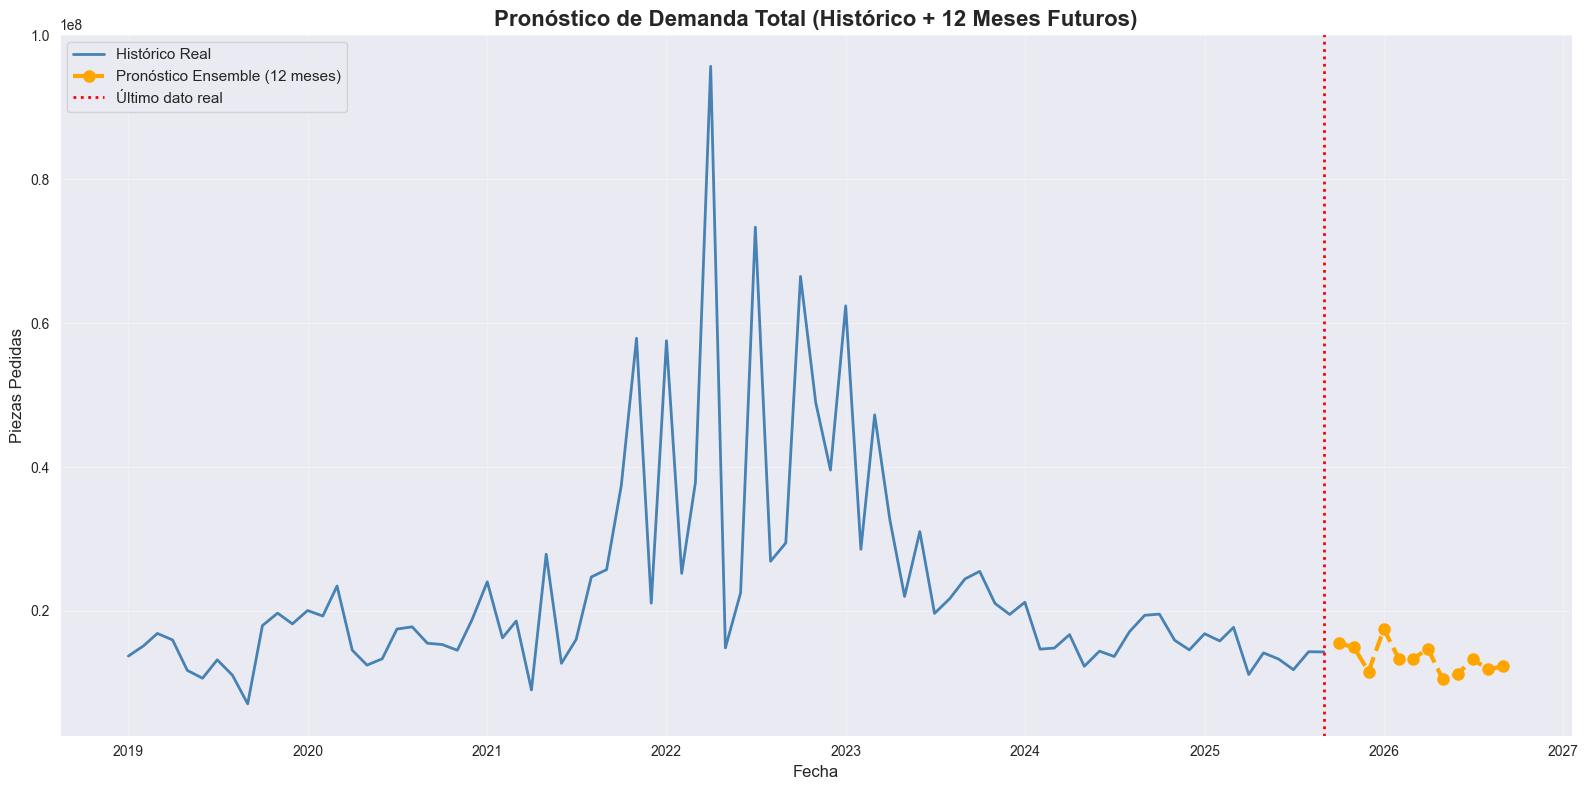

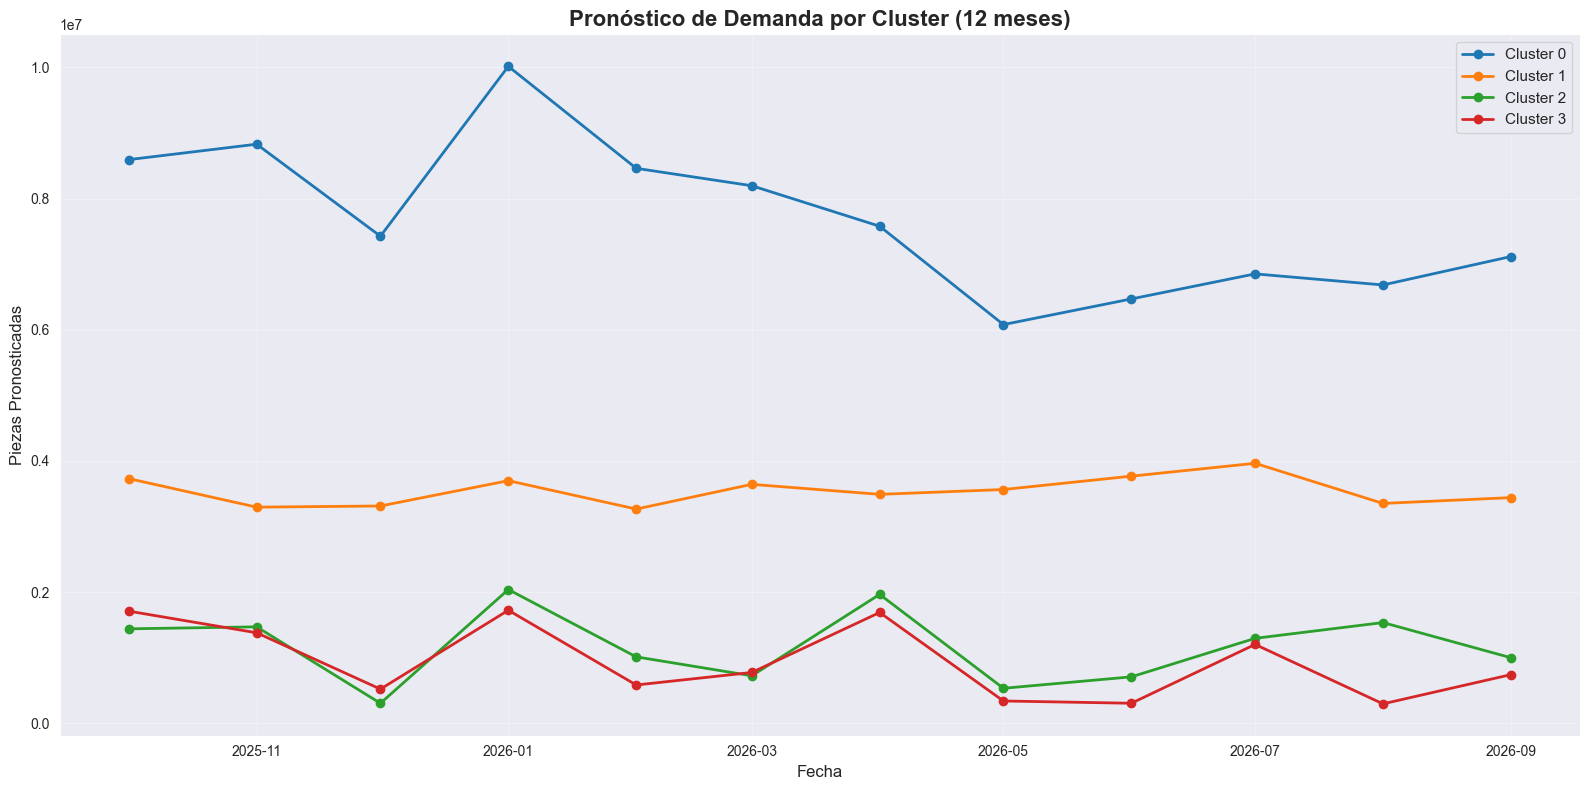

In [16]:
# Verificar si se generaron pronósticos en el bucle anterior
if lista_pronosticos:
    # 1. CONSOLIDACIÓN
    # ---------------------------------------------------------
    df_pronostico_maestro = pd.concat(lista_pronosticos, ignore_index=True)

    # Fusionar con la información de Clusters (del paso de PCA/K-Means)
    # Esto es crucial para los filtros del Dashboard
    df_cluster_map = df_pca[ID_COLS + ['Cluster']].copy()

    df_pronostico_maestro = pd.merge(
        df_pronostico_maestro,
        df_cluster_map,
        on=ID_COLS,
        how='left'
    )

    # 2. LIMPIEZA Y RENOMBRAMIENTO
    # ---------------------------------------------------------
    METRIC_CLEAN = METRIC_COL.replace("_", "")

    # Renombrar columnas técnicas a nombres de negocio
    df_pronostico_maestro = df_pronostico_maestro.rename(columns={
        'ds': 'Fecha_Pronostico',
        'yhat': f'Pronostico_Ensemble_{METRIC_CLEAN}',
        'yhat_lower': 'Pronostico_Min',
        'yhat_upper': 'Pronostico_Max'
    })

    # Definir orden final de columnas
    columnas_finales = [
        'Producto_Descripcion',
        'Cliente_Descripcion',
        'Cluster',
        'Fecha_Pronostico',
        f'Pronostico_Ensemble_{METRIC_CLEAN}',
        'Pronostico_Min',
        'Pronostico_Max'
    ]

    # Filtrar el DataFrame final
    df_pronostico_maestro = df_pronostico_maestro[columnas_finales]

    print("\n" + "="*80)
    print(" PRONÓSTICO MAESTRO GENERADO EXITOSAMENTE")
    print("="*80)
    print(f"\nTotal de registros generados: {len(df_pronostico_maestro)}")
    print(f"\nPrimeras filas:")
    print(df_pronostico_maestro.head(10))

    # Resumen rápido por cluster para control de calidad
    pronostico_col = f'Pronostico_Ensemble_{METRIC_CLEAN}'
    resumen_cluster = df_pronostico_maestro.groupby('Cluster')[pronostico_col].sum().reset_index()
    resumen_cluster = resumen_cluster.rename(columns={pronostico_col: 'Suma_Pronostico_Total'})

    print("\n--- Resumen por Cluster ---")
    print(resumen_cluster)
    print(f"\n Suma Total Global Pronosticada: {resumen_cluster['Suma_Pronostico_Total'].sum():,.0f}")

    # 3. EXPORTACIÓN A BASE DE DATOS SQL (AUTOMATIZACIÓN)
    # ---------------------------------------------------------
    try:
        print("\n🔄 Conectando con Base de Datos SQL...")
        # Guardamos tanto el histórico limpio (df_final) como el nuevo pronóstico
        db_manager.guardar_datos_reales(df_final, df_pronostico_maestro)
        print("✅ Base de datos actualizada. El Dashboard ya muestra los nuevos datos.")
    except Exception as e:
        print(f"❌ Error al actualizar Base de Datos SQL: {e}")
        print("   (Asegúrate de que 'db_manager.py' esté en la misma carpeta)")

    # 4. EXPORTACIÓN A CSV (RESPALDO TRADICIONAL)
    # ---------------------------------------------------------
    try:
        df_pronostico_maestro.to_csv(OUTPUT_FILE_NAME, index=False, decimal='.', sep=',')
        print(f"\n✅ Archivo CSV exportado exitosamente: '{OUTPUT_FILE_NAME}'")
    except Exception as e:
        print(f"\n❌ Error al exportar CSV: {e}")

    # 5. VISUALIZACIÓN FINAL: PRONÓSTICO AGREGADO
    # ---------------------------------------------------------
    # Agrupar todo el pronóstico por fecha para ver la tendencia global
    df_pronostico_agregado = df_pronostico_maestro.groupby('Fecha_Pronostico')[pronostico_col].sum().reset_index()

    plt.figure(figsize=(16, 8))

    # a) Graficar Histórico Real (df_agregado viene de la Sección 2 del script original)
    plt.plot(df_agregado['Fecha'], df_agregado[METRIC_COL],
             label='Histórico Real', linewidth=2, color='steelblue')

    # b) Graficar Pronóstico Futuro
    plt.plot(df_pronostico_agregado['Fecha_Pronostico'],
             df_pronostico_agregado[pronostico_col],
             label='Pronóstico Ensemble (12 meses)',
             linewidth=3, color='orange', linestyle='--', marker='o', markersize=8)

    # Línea divisoria "Hoy"
    plt.axvline(x=df_agregado['Fecha'].max(), color='red', linestyle=':',
                linewidth=2, label='Último dato real')

    plt.title('Pronóstico de Demanda Total (Histórico + 12 Meses Futuros)',
              fontsize=16, fontweight='bold')
    plt.xlabel('Fecha', fontsize=12)
    plt.ylabel('Piezas Pedidas', fontsize=12)
    plt.legend(fontsize=11, loc='best')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # 6. VISUALIZACIÓN POR CLUSTER
    # ---------------------------------------------------------
    df_cluster_time = df_pronostico_maestro.groupby(['Cluster', 'Fecha_Pronostico'])[pronostico_col].sum().reset_index()

    plt.figure(figsize=(16, 8))

    # Iterar sobre cada cluster para graficar su línea
    for cluster in sorted(df_cluster_time['Cluster'].unique()):
        df_cluster_subset = df_cluster_time[df_cluster_time['Cluster'] == cluster]
        plt.plot(df_cluster_subset['Fecha_Pronostico'],
                 df_cluster_subset[pronostico_col],
                 label=f'Cluster {cluster}', linewidth=2, marker='o', markersize=6)

    plt.title('Pronóstico de Demanda por Cluster (12 meses)', fontsize=16, fontweight='bold')
    plt.xlabel('Fecha', fontsize=12)
    plt.ylabel('Piezas Pronosticadas', fontsize=12)
    plt.legend(fontsize=11, loc='best')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

else:
    print("\n⚠️ No se generaron pronósticos. Verifica los datos y filtros en el bucle anterior.")

# Discusión
### **Análisis Matemático del Modelo**
La elección del modelo de Ensamble por Promedio se justifica matemáticamente por la reducción de la varianza del estimador final.

**Formulación:**
$$
\hat{y}_{t}=\frac{1}{3}(\hat{y}_{RF}(t)+\hat{y}_{SARIMA}(t)+\hat{y}_{Prophet}(t))
$$

**Propiedades:** Al combinar un modelo estocástico lineal (SARIMA), un modelo aditivo generalizado (Prophet) y un modelo de aprendizaje no paramétrico (Random Forest), el sistema se vuelve resiliente. Mientras Random Forest puede sobreajustar ruido local, Prophet tiende a suavizar en exceso; el promedio cancela estos sesgos opuestos.

**Interpretación de Variables**
El análisis de importancia de variables (Feature Importance) del componente Random Forest reveló que year (año) y dayofyear (día del año) son los predictores más influyentes, con pesos de 0.50 y 0.28 respectivamente. Desde una perspectiva teórica, esto confirma que la demanda no es aleatoria, sino que está dictada fuertemente por:
1. **Estacionalidad Intra-anual (dayofyear):** Validando la necesidad de componentes
estacionales como los usados en SARIMA (s=12).
2. **Tendencia (year):** Indicando un crecimiento o decrecimiento estructural a largo
plazo que justifica modelos capaces de manejar series no estacionarias.


# Conclusiones
### *Cumplimiento del Objetivo*
El proyecto cumplió exitosamente con el objetivo de desarrollar un sistema de soporte a la decisión basado en datos. La implementación del Meta-modelo de Ensamble demostró ser superior al uso de algoritmos aislados, proporcionando una predicción resiliente ante la volatilidad del mercado.

Además, el modelo no solo entrega un valor puntual, sino rangos de certeza (Pronostico_Min y Pronostico_Max), lo cual es crucial para la gestión de inventarios y la preparación de niveles de stock de seguridad. La integración final de estos resultados en una base de datos SQL permite a la organización anticipar la demanda de sus productos clave con un horizonte de 12 meses.

# Referencias
## Bibliografía
* Hyndman, R. J., & Athanasopoulos, G. (2018). Forecasting: principles and practice (2nd ed.). OTexts.
* Box, G. E. P., Jenkins, G. M., Reinsel, G. C., & Ljung, G. M. (2015). Time Series Analysis: Forecasting and Control (5th ed.). John Wiley & Sons.
* Taylor, S. J., & Letham, B. (2018). Forecasting at Scale. The American Statistician, 72(1), 37-45.
* Géron, A. (2022). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems (3rd ed.). O'Reilly Media.
* Dietterich, T. G. (2000). Ensemble methods in machine learning. International workshop on multiple classifier systems. Springer.